In [2]:
import pandas as pd
df = pd.read_csv("Traffic_Crashes.csv")
"""
Maybe try and predict what hour the crash happened
or predict the what kind of crash the crash hit,
or MOST_SEVERE_INJURY type, which has 5 options
from all the other factorsm remove:
lat and long, data,crash_dae,est_i,crash_record_id, and maybe more 
"""

/var/folders/8t/y5v94x215r973w80szwrht8r0000gq/T/ipykernel_42870/2438239821.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes.csv")


'\nMaybe try and predict what hour the crash happened\nor predict the what kind of crash the crash hit,\nor MOST_SEVERE_INJURY type, which has 5 options\nfrom all the other factorsm remove:\nlat and long, data,crash_dae,est_i,crash_record_id, and maybe more \n'

In [3]:
df.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,96143f32b69c4b086becfe7dd07c746dc913954472f2d0...,NaN,09/30/2025 02:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,2,3,9,41.857666,-87.645787,POINT (-87.64578712427 41.857665788293)
1,303eead1cd453666cee87f05bf5547804b260ded566357...,NaN,09/29/2025 11:29:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,23,2,9,41.954430,-87.750172,POINT (-87.750172061887 41.954430241508)
2,dddfc8251db0607acd3f6af15282ea5d672186b424e17c...,NaN,09/29/2025 10:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,...,0.0,0.0,2.0,0.0,22,2,9,41.872392,-87.627396,POINT (-87.627396122243 41.872391868197)
3,77dedf5a81dd0f5e1ef932b1c80c79e1d6746ad51d17b8...,NaN,09/29/2025 10:48:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,1.0,0.0,1.0,0.0,22,2,9,41.877544,-87.696257,POINT (-87.6962568014 41.877543802805)
4,3d60940512253f133935e5f3732db7aa715049a72e1d34...,NaN,09/29/2025 10:15:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,2,9,41.912716,-87.770457,POINT (-87.770456682056 41.912716438518)


In [4]:
df["FIRST_CRASH_TYPE"].unique()

array(['PARKED MOTOR VEHICLE', 'SIDESWIPE SAME DIRECTION', 'TURNING',
       'REAR END', 'PEDALCYCLIST', 'PEDESTRIAN',
       'SIDESWIPE OPPOSITE DIRECTION', 'REAR TO REAR', 'ANGLE',
       'FIXED OBJECT', 'REAR TO SIDE', 'REAR TO FRONT', 'OVERTURNED',
       'HEAD ON', 'OTHER NONCOLLISION', 'OTHER OBJECT', 'ANIMAL', 'TRAIN'],
      dtype=object)

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

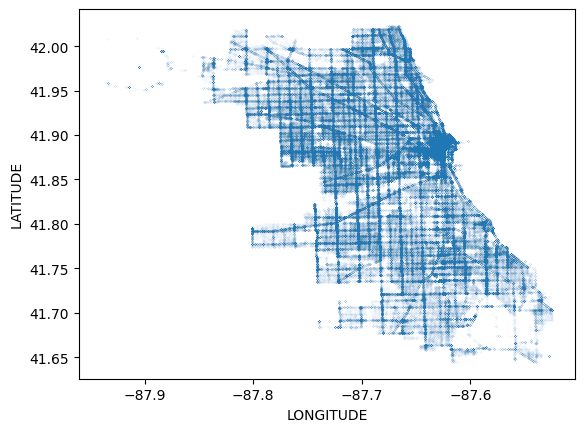

In [5]:
df[(df.LONGITUDE<-60) & (df.LATITUDE>30)].plot.scatter(x='LONGITUDE',y='LATITUDE',s=.00005) #for fun, look its chicago!

In [6]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [7]:
#checking column values before we start


In [8]:
df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     845724
NONINCAPACITATING INJURY     78890
REPORTED, NOT EVIDENT        44928
INCAPACITATING INJURY        16252
FATAL                         1049
Name: count, dtype: int64

In [9]:
df.isna().sum() #this one has no nans which is nie

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 916993
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         789970
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       32462
CRASH_TYPE                            0
INTERSECTION_RELATED_I           761738
NOT_RIGHT_OF_WAY_I               944484
HIT_AND_RUN_I                    678690
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [10]:
new_df = df.dropna(subset=['MOST_SEVERE_INJURY']) #so we only have data that has a most_server_injury
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
encoder = OrdinalEncoder(categories = [new_df['MOST_SEVERE_INJURY'].unique()])
encoder.fit_transform(new_df[['MOST_SEVERE_INJURY']]) #this is so our labels vec is encoded correctly, 0,1,2,3,4,5 etc 
y = new_df['MOST_SEVERE_INJURY']
X = new_df.drop('MOST_SEVERE_INJURY',axis=1)

In [11]:
X.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 915265
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         788174
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       32403
CRASH_TYPE                            0
INTERSECTION_RELATED_I           759670
NOT_RIGHT_OF_WAY_I               942635
HIT_AND_RUN_I                    677416
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
numeric_features = ['POSTED_SPEED_LIMIT','NUM_UNITS','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH',
                   'STREET_NO']
ordinal_features = ['LIGHTING_CONDITION','DEVICE_CONDITION','ROADWAY_SURFACE_COND','DAMAGE']
oneHot_features = ['WEATHER_CONDITION','TRAFFIC_CONTROL_DEVICE','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ROAD_DEFECT']

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline #pipeline stuff
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

numeric_processor=Pipeline(steps = [
    ('scaler',StandardScaler())
    ])
categorical_processor=Pipeline(steps = [
    ('encoder',OneHotEncoder(handle_unknown='ignore',min_frequency=.01)) #the ignore, encodes it to [0,0,0] all zeros, and does this for all nan values
    ])
ordinal_processor = Pipeline(steps=[
    ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])
feature_processor = ColumnTransformer(transformers = [
    ('num',numeric_processor,numeric_features),
    ('cat',categorical_processor,oneHot_features),
    ('ordinal',ordinal_processor,ordinal_features)],
    remainder='drop' 
    )
pipe_clf = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('clf',KNeighborsClassifier())
    ])
pipe_clf

,steps,"[('feature_processor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
pipe_clf.fit(X_train,y_train)

,steps,"[('feature_processor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_test_pred = pipe_clf.predict(X_test)
print(accuracy_score(y_test,y_test_pred))